In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

# Modelling Helpers
#from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

#import keras
#from keras import backend as K

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

# loading packages
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs

# machine learning: XGB
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost.sklearn import XGBRegressor # wrapper
from lightgbm import LGBMRegressor

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns",50)

# Configure visualisations
sns.set()
%matplotlib inline
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

## Useful Functions

In [2]:
def fast_loook(data,drop_columns=None,target=None,r_st=48):

    X=data.drop(columns=drop_columns)
    y=data[target]



    x_tr,x_ts,y_tr,y_ts=train_test_split(X,y,random_state=r_st)

    print("Train Data Shape:",x_tr.shape,y_tr.shape,"Test Data Shape:",x_ts.shape,y_ts.shape)

    model=LGBMRegressor(n_estimators=1000,max_depth=5,num_leaves=64)
    model.fit(x_tr,y_tr)

    pr_tr=model.predict(x_tr)
    pr_ts=model.predict(x_ts)
    
    print("Train Score:",r2_score(y_tr,pr_tr),"Train RMSE:",np.sqrt(mean_squared_error(y_tr,pr_tr)))
    print("Test Score:",r2_score(y_ts,pr_ts),"Test RMSE:",np.sqrt(mean_squared_error(y_ts,pr_ts)))
    
      
    f_i={}
    for f,n in zip(model.feature_importances_,model.feature_name_):
        f_i[n]=f

    feature_importance=pd.Series(f_i).sort_values(ascending=False)
    print(feature_importance)

    sns.barplot(x=feature_importance.values, y=feature_importance.index, orient='h')
    plt.title("Importance Of Features")
    plt.tight_layout()
    plt.show()

## Data

**Load Data**

In [10]:
#try load last train csv data 
try:
    train=pd.read_csv("l_train.csv",parse_dates=True,low_memory=False,index_col="Date")

except:
    train=pd.read_csv("train.csv",parse_dates=True,low_memory=False,index_col="Date")

store=pd.read_csv("store.csv",low_memory=False)

test=pd.read_csv("test.csv",parse_dates=True,low_memory=False,index_col="Date")

In [11]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer,PrevOpen
Date,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,1.0
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,1.0
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,1.0
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,1.0
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,1.0


In [25]:
# lEGACY

df=train.copy()

# Descriptive Statistic

## Train Data

In [5]:
train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [8]:
# Check unique values
for i in train.columns:
  print(f"Number of unique value  for {i} : {train[i].nunique()}")
  print("-----------------------")

Number of unique value  for Store : 1115
-----------------------
Number of unique value  for DayOfWeek : 7
-----------------------
Number of unique value  for Sales : 21734
-----------------------
Number of unique value  for Customers : 4086
-----------------------
Number of unique value  for Open : 2
-----------------------
Number of unique value  for Promo : 2
-----------------------
Number of unique value  for StateHoliday : 4
-----------------------
Number of unique value  for SchoolHoliday : 2
-----------------------


**Gains**
- The dataset is from 1 January 2013 to 31 July 2015,i.e. approx. 2.5 yrs.
- There is no missing value
- DayOfWeek, Open, Promo, SchoolHoliday, StateHoliday are categorical features

**Short description for features:**
- `Sales`: the turnover for any given day (target variable).
- `Customers`: the number of customers on a given day.
- `Open`: an indicator for whether the store was open: 0 = closed, 1 = open.
- `Promo`: indicates whether a store is running a promo on that day.
- `StateHoliday`: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. 
- `SchoolHoliday`: indicates if the (Store, Date) was affected by the closure of public schools.

In [9]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


**Convert features (p-1)**

In [10]:
# convert feature type to categorical
train["DayOfWeek"]=train["DayOfWeek"].astype("category")
train["Open"]=train["Open"].astype("category")
train["Promo"]=train["Open"].astype("category")
train["SchoolHoliday"]=train["SchoolHoliday"].astype("category")
train["StateHoliday"]=train["StateHoliday"].astype("category")

**Adding new features (p-2)**

In [11]:
train["Year"]=train.index.year
train["Month"]=train.index.month
train["Day"]=train.index.day
train["WeekOfYear"]=train.index.weekofyear

train["SalesPerCustomer"]=train["Sales"]/train["Customers"]

In [12]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   Store             1017209 non-null  int64   
 1   DayOfWeek         1017209 non-null  category
 2   Sales             1017209 non-null  int64   
 3   Customers         1017209 non-null  int64   
 4   Open              1017209 non-null  category
 5   Promo             1017209 non-null  category
 6   StateHoliday      1017209 non-null  category
 7   SchoolHoliday     1017209 non-null  category
 8   Year              1017209 non-null  int64   
 9   Month             1017209 non-null  int64   
 10  Day               1017209 non-null  int64   
 11  WeekOfYear        1017209 non-null  int64   
 12  SalesPerCustomer  844340 non-null   float64 
dtypes: category(5), float64(1), int64(7)
memory usage: 74.7 MB


**Fast look data & ML model result**

In [28]:
train[train["Open"]==1]["Sales"].mean()

6955.514290755952

Train Data Shape: (762906, 10) (762906,) Test Data Shape: (254303, 10) (254303,)
Train Score: 0.9559732081596326 Train MSE: 808.3665437145914
Test Score: 0.9512708170133429 Test MSE: 848.1085336124213
Store            9452
DayOfWeek        4770
Day              4765
WeekOfYear       3173
Month            3143
Year             2287
Open             1886
StateHoliday      563
SchoolHoliday     492
Promo               0
dtype: int64


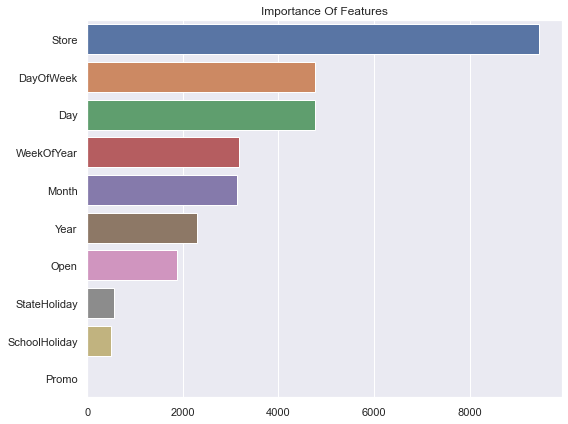

In [30]:
t_train=train.copy()

# convert some features to categorical
t_train["Store"]=t_train["Store"].astype("category")# that is important
t_train["Month"]=t_train["Month"].astype("category")
t_train["Year"]=t_train["Year"].astype("category")


drop_columns=["Sales","Customers","SalesPerCustomer"]
target="Sales"


fast_loook(t_train,drop_columns,target)

### Show distributions

In [34]:
# Show data  types
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   Store             1017209 non-null  int64   
 1   DayOfWeek         1017209 non-null  category
 2   Sales             1017209 non-null  int64   
 3   Customers         1017209 non-null  int64   
 4   Open              1017209 non-null  category
 5   Promo             1017209 non-null  category
 6   StateHoliday      1017209 non-null  category
 7   SchoolHoliday     1017209 non-null  category
 8   Year              1017209 non-null  int64   
 9   Month             1017209 non-null  int64   
 10  Day               1017209 non-null  int64   
 11  WeekOfYear        1017209 non-null  int64   
 12  SalesPerCustomer  844340 non-null   float64 
dtypes: category(5), float64(1), int64(7)
memory usage: 74.7 MB


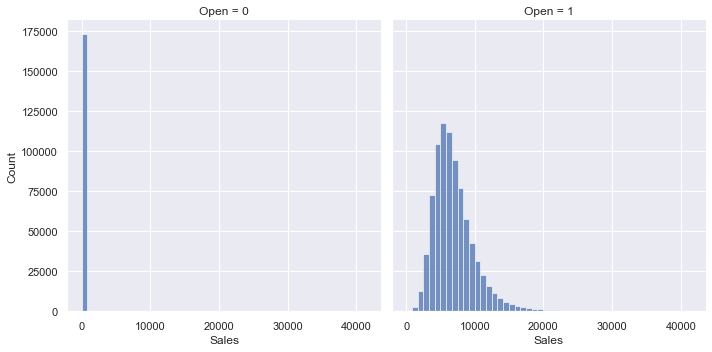

In [35]:
sns.displot(train,x="Sales",bins=50,col="Open");

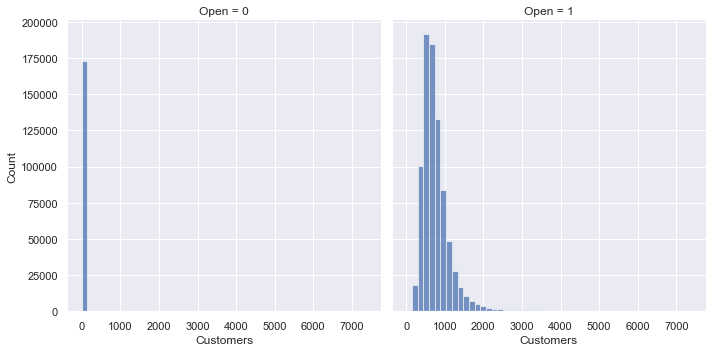

In [36]:
# Customers
sns.displot(train,x="Customers",bins=50,col="Open");

**Gains**

- sales values are zeros when store is closed (it is logical)
- Sales and Customers are similar dist.
- mean and median values are not same (or almost)

In [37]:
print(train["Sales"].median(),train["Sales"].mean())
print(train["Customers"].median(),train["Customers"].mean())

5744.0 5773.818972305593
609.0 633.1459464082602


### Categorical Ploting

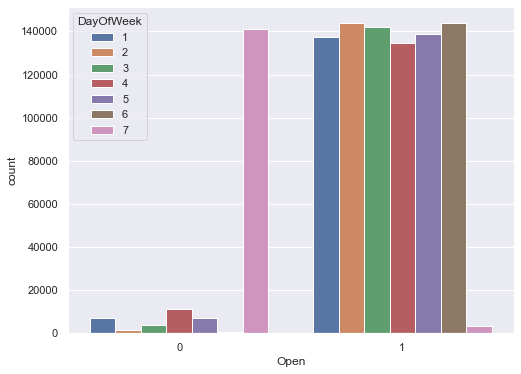

In [39]:
sns.countplot(x='Open',hue='DayOfWeek', data=train)
plt.show()

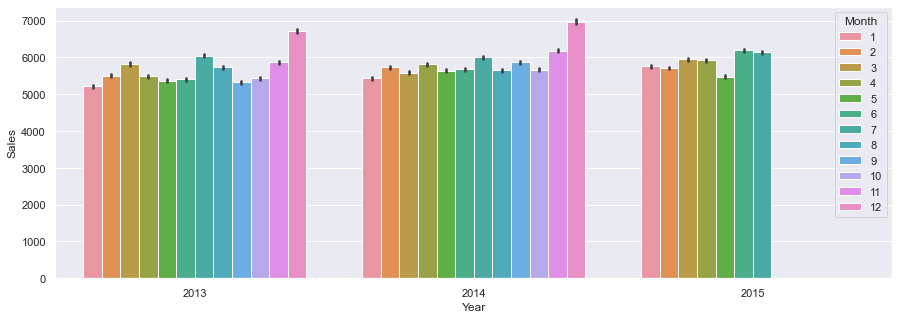

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x="Year",y="Sales",data=train,hue="Month");

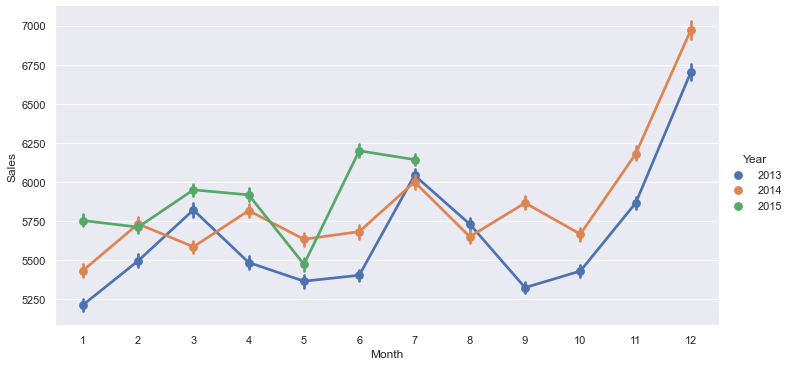

In [33]:
sns.catplot(x="Month",y="Sales",data=train,kind="point",hue="Year",aspect=2)

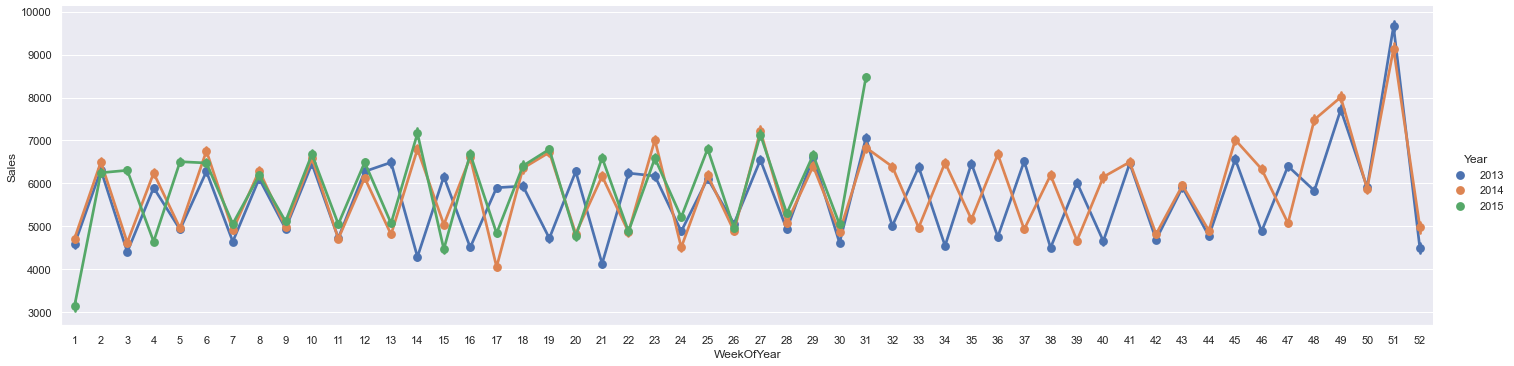

In [44]:
sns.catplot(x="WeekOfYear",y="Sales",data=train,kind="point",hue="Year",aspect=4);

`Now, we focus prediction, when store is open`

In [41]:
open_tr=train[train["Open"]==1]

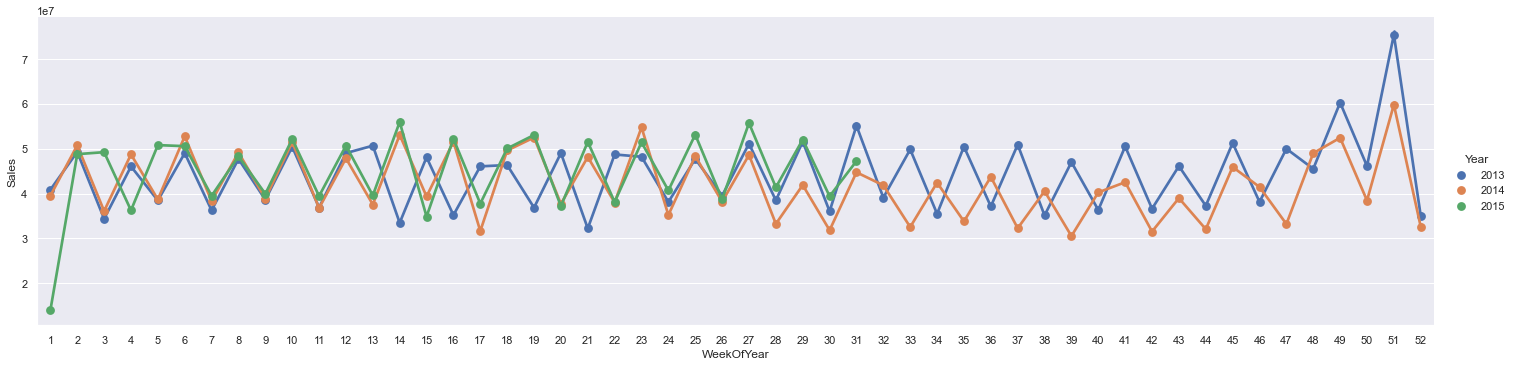

In [42]:
# this sum
sns.catplot(x="WeekOfYear",y="Sales",data=open_tr,kind="point",hue="Year",aspect=4,estimator=np.sum);

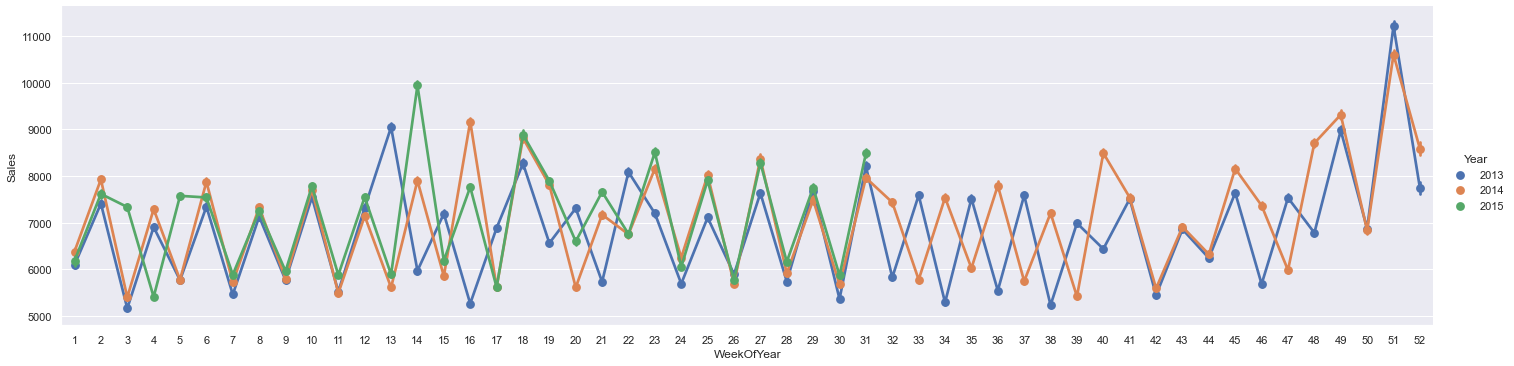

In [45]:
# this mean
sns.catplot(x="WeekOfYear",y="Sales",data=open_tr,kind="point",hue="Year",aspect=4);

**Day Of Week**

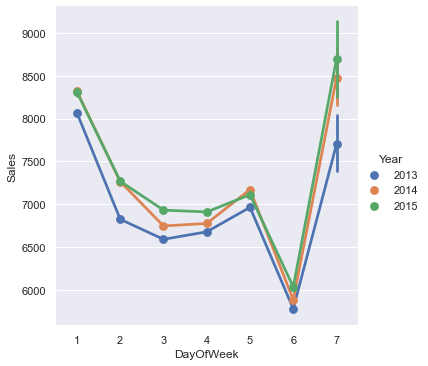

In [295]:
# this is mean value
sns.catplot(x="DayOfWeek",y="Sales",data=train[train["Open"]==1],kind="point",hue="Year")

First day of weak is most profit day

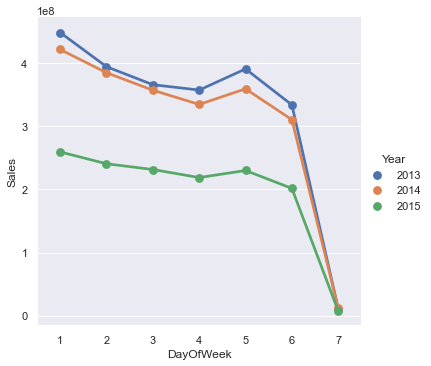

In [308]:
# this is sum value 
sns.catplot(x="DayOfWeek",y="Sales",data=train[train["Open"]==1],kind="point",hue="Year",estimator=np.sum)

I think it is not valid , bacause "2015" have less week
So we can filter data 

In [218]:
filter_train=train[(train["Month"]<=train[train["Year"]==2015]["Month"].max())&(train["Open"]==1)]

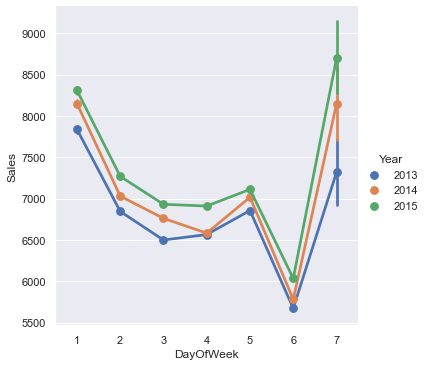

In [219]:
sns.catplot(x="DayOfWeek",y="Sales",data=filter_train,kind="point",hue="Year")

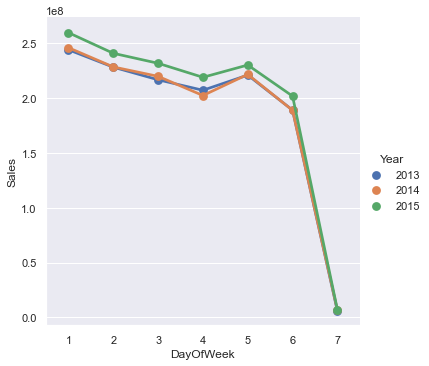

In [220]:
sns.catplot(x="DayOfWeek",y="Sales",data=filter_train,kind="point",hue="Year",estimator=np.sum)

**StateHoliday & Sales**

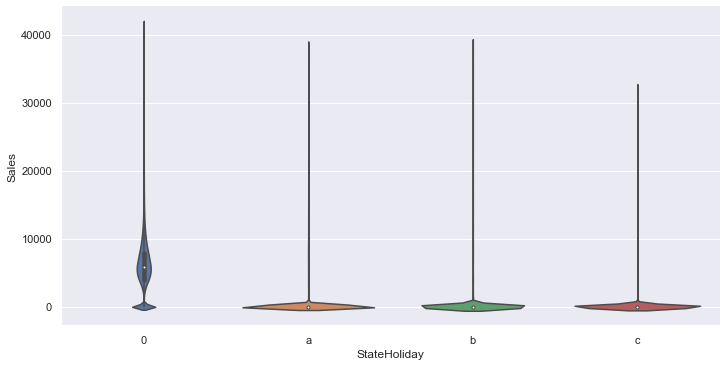

In [255]:
sns.catplot(x="StateHoliday",y="Sales",data=train,kind="violin",aspect=2);

This is not usefull, maybe remove zero values

In [257]:
# remove zero values
no_close=train[train["Open"]==1]

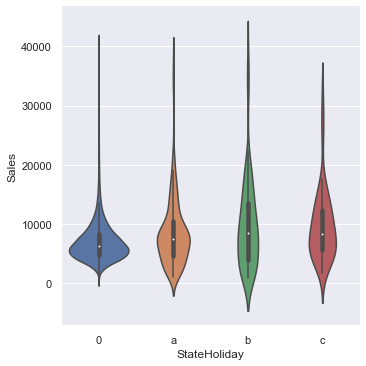

In [258]:
sns.catplot(x="StateHoliday",y="Sales",data=no_close,kind="violin");

**Add SchoolHoliday**

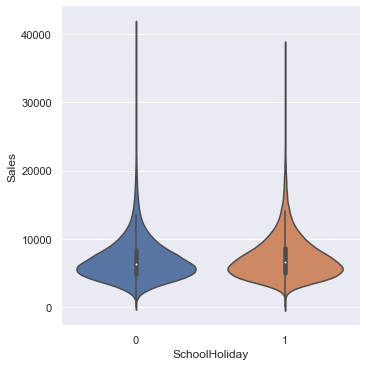

In [259]:
sns.catplot(x="SchoolHoliday",y="Sales",data=no_close,kind="violin")

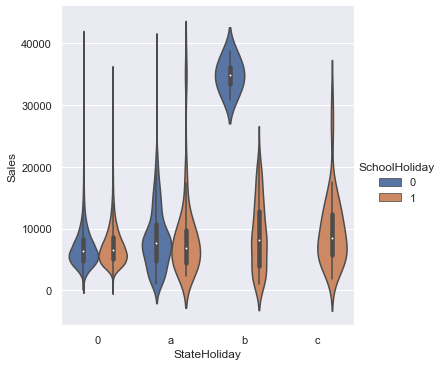

In [260]:
sns.catplot(x="StateHoliday",y="Sales",data=no_close,kind="violin",hue="SchoolHoliday")

In [259]:
no_close["StateHoliday"].value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [252]:
no_close.groupby("StateHoliday")["SchoolHoliday"].value_counts()

StateHoliday  SchoolHoliday
0             0                680339
              1                163143
a             0                   590
              1                   104
b             1                   139
              0                     6
c             1                    71
Name: SchoolHoliday, dtype: int64

In [269]:
train.groupby("Open")["StateHoliday"].value_counts()

Open  StateHoliday
0     0               142677
      a                19566
      b                 6545
      c                 4029
1     0               843482
      a                  694
      b                  145
      c                   71
Name: StateHoliday, dtype: int64

**Gains**
- The dataset is from 1 January 2013 to 31 July 2015,i.e. approx. 2.5 yrs.
- There is no missing value
- DayOfWeek, Open, Promo, SchoolHoliday, StateHoliday are categorical features
- sales values are zeros when store is closed (it is logical)`
- Sales and Customers are similar dist.
- mean and median values are not same(or almost)
- `SchoolHoliday does not have so much effect for 'sales' `
- `StateHoliday have different effects for sales `
- `Sales means are diffrent for each year and month `
- `There is no close store on saturday`
- `There is no open store on sunday`

**Check Sales & Open**

In [318]:
#check close stores and their sales
close_tr=train[(train["Open"]==0)&(train["Sales"]==0)]


In [319]:
# Check data consistency

close_tr=train[(train["Open"]==0)]
set(close_tr["Sales"])

{0}

In [320]:
# Sales is zero but store is open

sale_is_zero=train[(train["Sales"]==0)&(train["Open"]==1)]
sale_is_zero

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer,StateHolidayFlag
Date,,,,,,,,,,,,,,
2015-05-15,971,5,0,0,1,1,0,1,2015,5,15,20,NaN,0
2015-03-26,674,4,0,0,1,1,0,0,2015,3,26,13,NaN,0
2015-02-05,699,4,0,0,1,1,0,0,2015,2,5,6,NaN,0
2014-10-01,708,3,0,0,1,1,0,0,2014,10,1,40,NaN,0
2014-09-22,357,1,0,0,1,1,0,0,2014,9,22,39,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-02-07,259,4,0,0,1,1,0,0,2013,2,7,6,NaN,0
2013-01-31,339,4,0,0,1,1,0,0,2013,1,31,5,NaN,0
2013-01-30,339,3,0,0,1,1,0,0,2013,1,30,5,NaN,0


**Extract new feature**

- if store is close at previous day , it can be caused sales in current day. So it can be added as  a new feature

In [197]:
tr=train.copy()

tr["PrevOpen"]=None
uni_store=tr["Store"].unique()


%%time

for s_n in uni_store:
    tr.loc[tr["Store"]==s_n,"PrevOpen"]=tr.loc[tr["Store"]==s_n,"Open"].shift(-1)
    
print("Done")

**Without "PrevOpen"**

Train Data Shape: (633294, 10) (633294,) Test Data Shape: (211098, 10) (211098,)
Train Score: 0.9277852454395258 Train MSE: 834.1671971782446
Test Score: 0.9192582767871766 Test MSE: 882.1325239807628
Store            9445
Day              5730
DayOfWeek        4251
WeekOfYear       3824
Month            3524
Year             2661
SchoolHoliday     532
StateHoliday      275
Promo               0
Open                0
dtype: int64


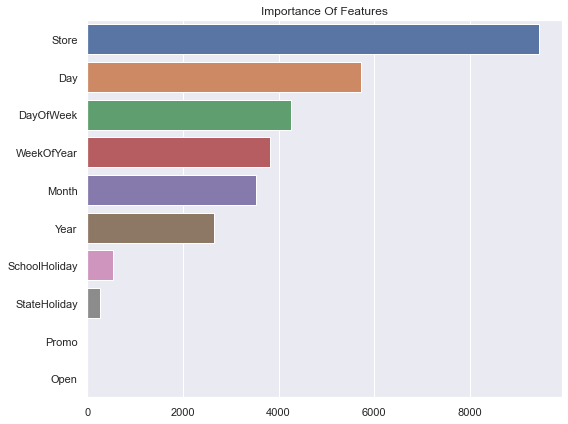

In [203]:
#t_train=train[train["Open"]==1].copy()
t_train=train[train["Open"]==1].copy()
#t_train=tr.copy()

# convert some features to categorical
t_train["Store"]=t_train["Store"].astype("category")# that is important
t_train["Month"]=t_train["Month"].astype("category")
t_train["Year"]=t_train["Year"].astype("category")
#t_train["PrevOpen"]=t_train["PrevOpen"].astype("category")


drop_columns=["Sales","Customers","SalesPerCustomer"]
target="Sales"

fast_loook(t_train,drop_columns,target)


**With "PrevOpen"**

Train Data Shape: (633294, 11) (633294,) Test Data Shape: (211098, 11) (211098,)
Train Score: 0.9300065298340763 Train MSE: 821.2377429107956
Test Score: 0.9213561716408974 Test MSE: 870.5969694019643
Store            9136
Day              5752
DayOfWeek        3888
WeekOfYear       3792
Month            3088
Year             2549
PrevOpen         1098
SchoolHoliday     611
StateHoliday      288
Promo               0
Open                0
dtype: int64


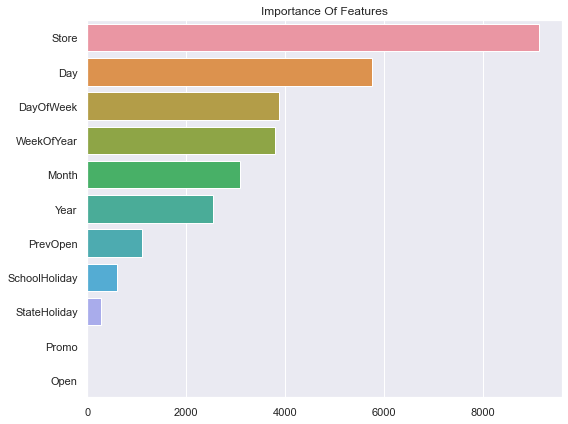

In [241]:
#t_train=train[train["Open"]==1].copy()
t_train=tr[tr["Open"]==1].copy()
#t_train=tr.copy()

# convert some features to categorical
t_train["Store"]=t_train["Store"].astype("category")# that is important
t_train["Month"]=t_train["Month"].astype("category")
t_train["Year"]=t_train["Year"].astype("category")
t_train["PrevOpen"]=t_train["PrevOpen"].astype("category")


drop_columns=["Sales","Customers","SalesPerCustomer"]
target="Sales"

fast_loook(t_train,drop_columns,target)

It is good new. We profit aprox 12 dolar per day for each store. So it can be added as new a feature.

**Adding "PrevOpen" feature**

In [254]:
train=tr.copy()
train["PrevOpen"]=train["PrevOpen"].astype("category")
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer,PrevOpen
Date,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,1.0
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,1.0
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,1.0
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,1.0
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,1.0


**Remove closed stores**

In [255]:
# Closed stores and days which didn't have any sales won't be counted into the forecasts.
train = train[(train["Open"] != 0)]

print("New train data shape after remove closed stores")
train.shape

New train data shape after remove closed stores


(844392, 14)

### Correlation

In [253]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844392 entries, 2015-07-31 to 2013-01-01
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Store             844392 non-null  category
 1   DayOfWeek         844392 non-null  category
 2   Sales             844392 non-null  int64   
 3   Customers         844392 non-null  int64   
 4   Open              844392 non-null  category
 5   Promo             844392 non-null  category
 6   StateHoliday      844392 non-null  category
 7   SchoolHoliday     844392 non-null  category
 8   Year              844392 non-null  category
 9   Month             844392 non-null  category
 10  Day               844392 non-null  int64   
 11  WeekOfYear        844392 non-null  int64   
 12  SalesPerCustomer  844340 non-null  float64 
 13  PrevOpen          844374 non-null  category
dtypes: category(9), float64(1), int64(4)
memory usage: 46.8 MB


<AxesSubplot:>

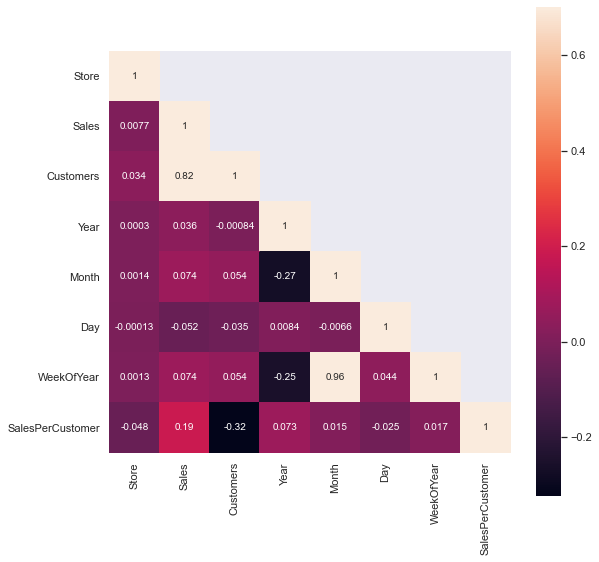

In [230]:
correlation_map = train.corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

Actually, this graph maybe not be logical, some features are not numeric values.

**

In [239]:
train

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer,PrevOpen
Date,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,1.0
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,1.0
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,1.0
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,1.0
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,682,2,3375,566,1,1,a,1,2013,1,1,1,5.962898,NaN
2013-01-01,733,2,10765,2377,1,1,a,1,2013,1,1,1,4.528818,NaN
2013-01-01,769,2,5035,1248,1,1,a,1,2013,1,1,1,4.034455,NaN


Train Data Shape: (633294, 11) (633294,) Test Data Shape: (211098, 11) (211098,)
Train Score: 0.9300065298340763 Train MSE: 821.2377429107956
Test Score: 0.9213561716408974 Test MSE: 870.5969694019643
Store            9136
Day              5752
DayOfWeek        3888
WeekOfYear       3792
Month            3088
Year             2549
PrevOpen         1098
SchoolHoliday     611
StateHoliday      288
Promo               0
Open                0
dtype: int64


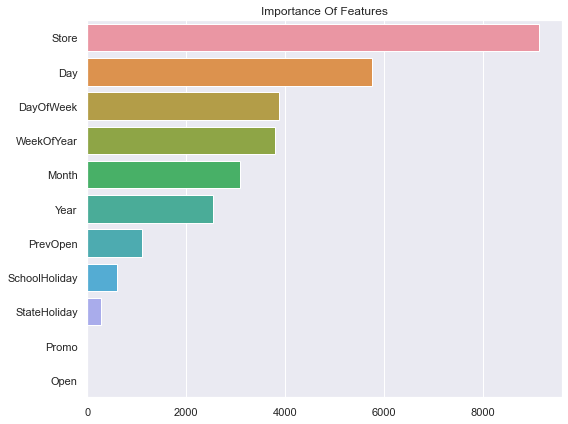

In [256]:
#t_train=train[train["Open"]==1].copy()
t_train=train.copy()
#t_train=tr.copy()

# convert some features to categorical
t_train["Store"]=t_train["Store"].astype("category")# that is important
t_train["Month"]=t_train["Month"].astype("category")
t_train["Year"]=t_train["Year"].astype("category")



drop_columns=["Sales","Customers","SalesPerCustomer"]
target="Sales"

fast_loook(t_train,drop_columns,target)

**Save last data**

In [280]:
train.to_csv("l_train.csv")

## Store Data

**a = public holiday, b = Easter holiday, c = Christmas, 0 = None**

In [12]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**Short description for features:**

- Store: a unique Id for each store
- StoreType: differentiates between 4 different store models: a, b, c, d
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance: distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
- Promo2: Promo2 is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Check unique and missing values**

In [13]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [232]:
# Check unique values
for i in store.columns:
      print(f"Number of unique value  for {i} : {store[i].nunique()}")
      print("-----------------------")

Number of unique value  for Store : 1115
-----------------------
Number of unique value  for StoreType : 4
-----------------------
Number of unique value  for Assortment : 3
-----------------------
Number of unique value  for CompetitionDistance : 654
-----------------------
Number of unique value  for CompetitionOpenSinceMonth : 12
-----------------------
Number of unique value  for CompetitionOpenSinceYear : 23
-----------------------
Number of unique value  for Promo2 : 2
-----------------------
Number of unique value  for Promo2SinceWeek : 24
-----------------------
Number of unique value  for Promo2SinceYear : 7
-----------------------
Number of unique value  for PromoInterval : 3
-----------------------


In [15]:
store["Promo2SinceYear"].unique() 

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [16]:
store["Promo2SinceWeek"].unique() #this time value

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [17]:
# missing value
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**Gains**

- I think some featues have two properties , first is time or distance, second is categorical  like "Promo2SinceYear"

### Missing Value Processing

**Promo Features**

In [18]:
store.groupby("Promo2")["Promo2SinceWeek"].value_counts()

Promo2  Promo2SinceWeek
1       14.0               81
        40.0               77
        31.0               44
        10.0               42
        5.0                39
        1.0                35
        37.0               35
        13.0               34
        45.0               34
        22.0               33
        18.0               29
        35.0               25
        9.0                14
        27.0               11
        36.0               10
        48.0                9
        39.0                6
        23.0                5
        44.0                3
        6.0                 1
        26.0                1
        28.0                1
        49.0                1
        50.0                1
Name: Promo2SinceWeek, dtype: int64

It think all nan values, when Promo2=0

In [19]:
# check nan values 
store[store["Promo2"]==0]["Promo2SinceWeek"].isnull().sum()

544

It can be gived 0 value for nan values, if promo2 is not exist, Promo2SinceWeek can not be different 0 value

In [20]:
store["Promo2SinceWeek"].fillna(0,inplace=True)
store["Promo2SinceYear"].fillna(0,inplace=True)
store["PromoInterval"].fillna(0,inplace=True)

**Competition Features**

is related with "Promo2" ?

In [25]:
store[store["Promo2"]==0]["CompetitionOpenSinceYear"].isnull().sum()
# no 

148

There are 3 nan values for `CompetitionDistance` , it can be used median value

In [37]:
store["CompetitionDistance"].fillna(store["CompetitionDistance"].median(),inplace =True )

Adding New Feature for missing Competition Features as `MissingCompetition`**

In [161]:
store["MissingCompetition"]=0
store[pd.isnull(store["CompetitionOpenSinceMonth"])]["MissingCompetetion"]=1
store["MissingCompetition"]=store["MissingCompetition"].astype("category")

Fillna with 0 values other values

In [42]:
store.fillna(0,inplace=True)

In [44]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
MissingCompetition           0
dtype: int64

### Check Features Relationship

Add Sales Features

In [200]:
sstore=store.copy()

In [201]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer,PrevOpen
Date,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,1.0
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,1.0
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,1.0
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,1.0
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,1.0


In [202]:
s=train.groupby(["Store","Month"])["Sales"].mean()
store_sales_with_month=s.reset_index().pivot_table(columns="Month",index="Store")
store_sales_with_month.head()

Sales                                                      \
Month           1            2            3            4            5    
Store                                                                    
1      4703.166667  4754.722222  4942.246753  4711.726027  4805.070423   
2      4678.435897  4717.236111  5066.623377  4941.684932  4868.652778   
3      6506.089744  6541.083333  7019.181818  6934.438356  7015.704225   
4      9183.448718  9504.000000  9649.493506  9679.506849  9832.666667   
5      4369.538462  4356.861111  4521.038961  4581.424658  4599.555556   

                                                                        \
Month           6            7            8            9            10   
Store                                                                    
1      4538.726027  4591.382716  4326.867925  4220.882353  4414.192308   
2      4952.386667  4996.938272  4643.679245  4860.960784  4649.211538   
3      7283.301370  7050.518519  6433.037736  6605.980392  6358.500000   
4      9590.840000  9459.987654  9372.377358  9100.254902  9053.461538   
5      4623.986486  4920.629630  4462.358491  4491.490196  4580.180000   

                                  
Month           11            12  
Store                             
1      5067.607843   6248.857143  
2      5123.235294   6217.020408  
3      7098.448980   8692.387755  
4      9810.627451  11853.061224  
5      4956.551020   6048.387755

In [203]:
# fix columns names
store_sales_with_month.columns=["Month_"+str(i+1) for i in range(12)]

In [204]:
# with month sales
sstore=pd.merge(sstore,store_sales_with_month,on="Store")

In [205]:
sstore["SalesMean"]=train.groupby("Store")["Sales"].mean().values

In [206]:
sstore

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,MissingCompetition,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,SalesMean
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0,4703.166667,4754.722222,4942.246753,4711.726027,4805.070423,4538.726027,4591.382716,4326.867925,4220.882353,4414.192308,5067.607843,6248.857143,4759.096031
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,4678.435897,4717.236111,5066.623377,4941.684932,4868.652778,4952.386667,4996.938272,4643.679245,4860.960784,4649.211538,5123.235294,6217.020408,4953.900510
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,6506.089744,6541.083333,7019.181818,6934.438356,7015.704225,7283.301370,7050.518519,6433.037736,6605.980392,6358.500000,7098.448980,8692.387755,6942.568678
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,0,9183.448718,9504.000000,9649.493506,9679.506849,9832.666667,9590.840000,9459.987654,9372.377358,9100.254902,9053.461538,9810.627451,11853.061224,9638.401786
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,0,4369.538462,4356.861111,4521.038961,4581.424658,4599.555556,4623.986486,4920.629630,4462.358491,4491.490196,4580.180000,4956.551020,6048.387755,4676.274711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0,5133.846154,5119.736111,5474.675325,5381.397260,5341.971831,5181.397260,4868.419753,4796.377358,5167.686275,5045.615385,5545.448980,6202.040816,5251.702182
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,0,10254.397436,10536.777778,10494.090909,10547.958904,10772.140845,10578.479452,9900.419753,9538.245283,9598.274510,9228.500000,9816.448980,11078.469388,10236.577664
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,0,6159.371795,6226.250000,6512.948052,6616.520548,6621.888889,6457.760000,6485.493827,6720.301887,6081.607843,6061.865385,7306.333333,9028.714286,6627.859694
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0,0,17905.410256,19406.194444,20269.922078,21566.013699,21674.847222,21107.426667,21354.703704,20913.811321,19610.039216,19859.173077,20531.117647,24733.244898,20666.562500


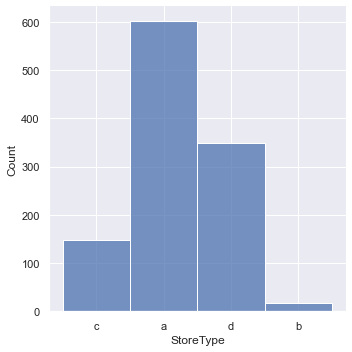

In [145]:
sns.displot(sstore,x="StoreType")

In [207]:
sstore["StoreType"].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

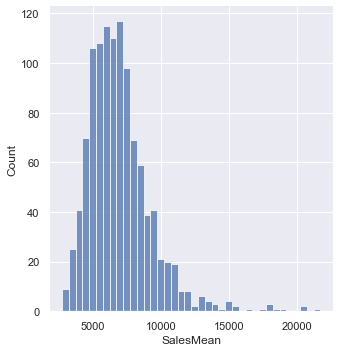

In [146]:
sns.displot(sstore,x="SalesMean")

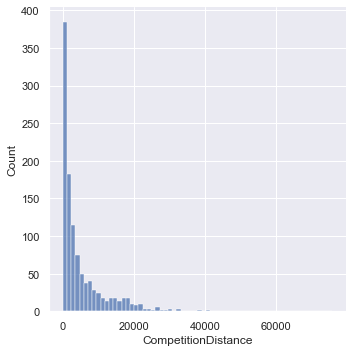

In [150]:
sns.displot(sstore,x="CompetitionDistance")

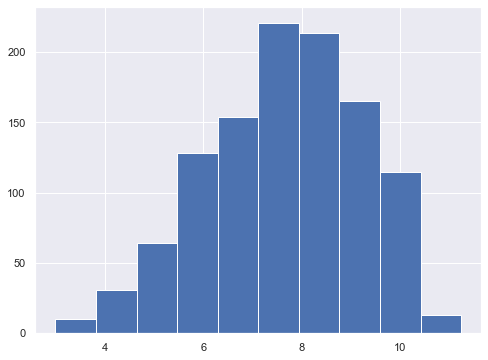

In [151]:
plt.hist(np.log(sstore["CompetitionDistance"]));

In [152]:
sstore["ExpeCompetitionDistance"]=np.log(sstore["CompetitionDistance"]).values

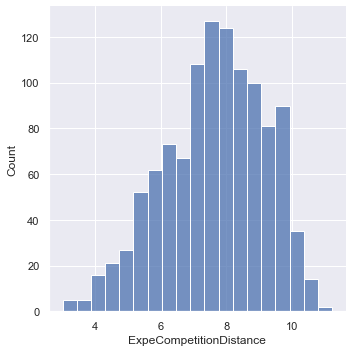

In [153]:
sns.displot(sstore,x="ExpeCompetitionDistance")

<AxesSubplot:xlabel='CompetitionDistance', ylabel='SalesMean'>

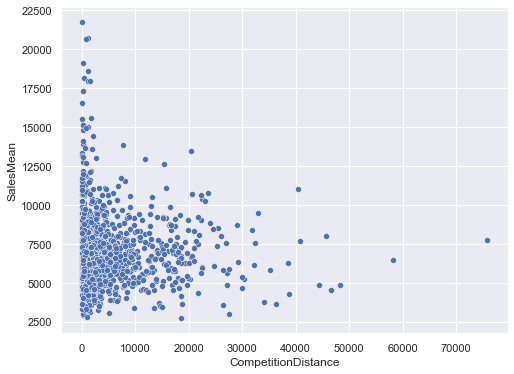

In [154]:
sns.scatterplot(x="CompetitionDistance",y="SalesMean",data=sstore)

<AxesSubplot:xlabel='ExpeCompetitionDistance', ylabel='SalesMean'>

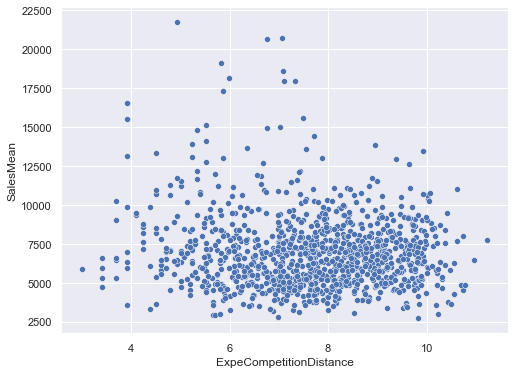

In [155]:
sns.scatterplot(x="ExpeCompetitionDistance",y="SalesMean",data=sstore)

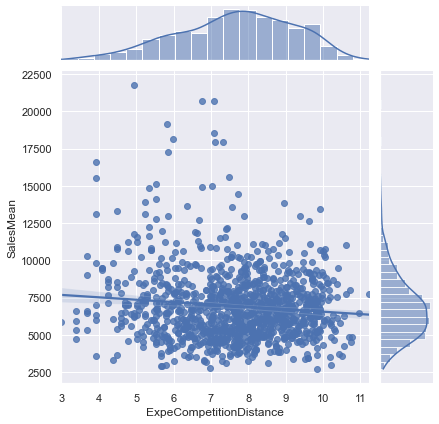

In [141]:
sns.jointplot(x="ExpeCompetitionDistance",y="SalesMean",data=sstore,kind="reg")

In [140]:
sstore[["SalesMean","CompetitionDistance","ExpeCompetitionDistance"]].corr()

,SalesMean,CompetitionDistance,ExpeCompetitionDistance
SalesMean,1.000000,-0.041649,-0.104650
CompetitionDistance,-0.041649,1.000000,0.753532
ExpeCompetitionDistance,-0.104650,0.753532,1.000000


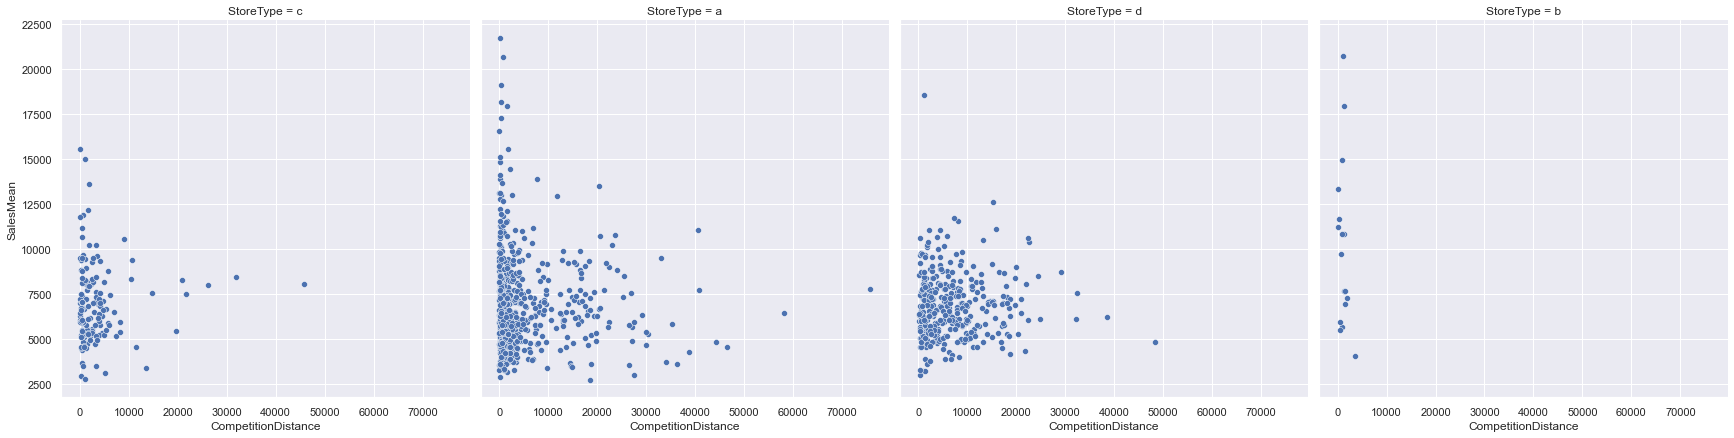

In [81]:
sns.relplot(x="CompetitionDistance",y="SalesMean",data=sstore,col="StoreType",height=6)

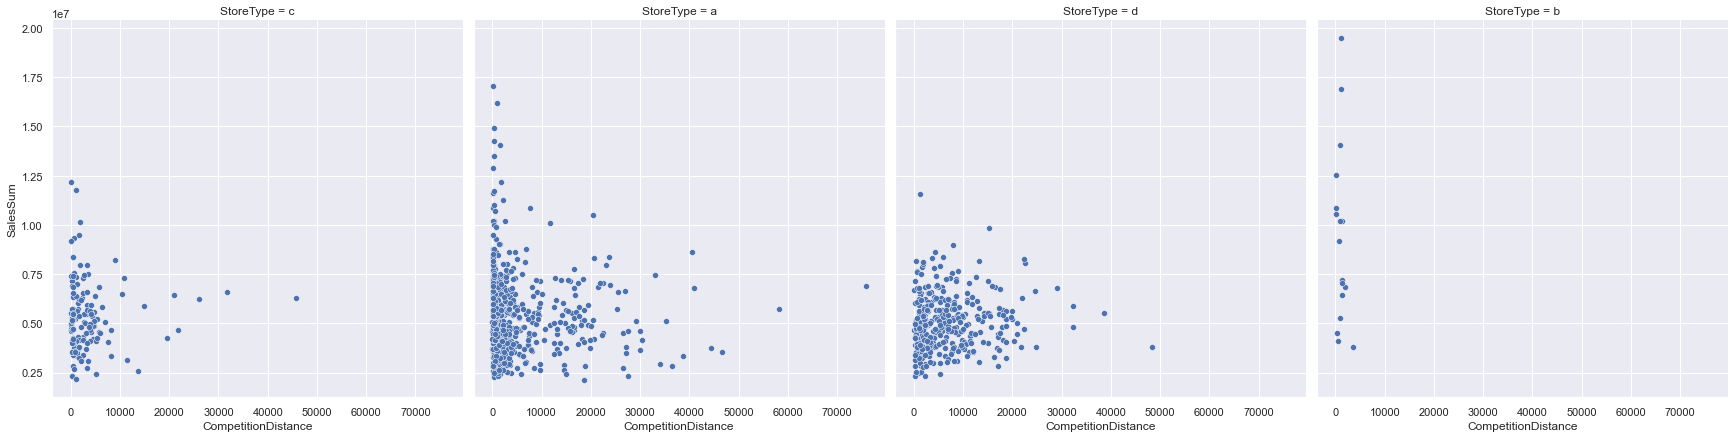

In [89]:
sns.relplot(x="CompetitionDistance",y="SalesSum",data=sstore,col="StoreType",height=6)

## Merge Data

**Merge train and store files**

In [157]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

In [158]:
train_store.shape

(844392, 14)

**Try with new feature**

Train Data Shape: (633294, 21) (633294,) Test Data Shape: (211098, 21) (211098,)
Train Score: 0.9414828842627833 Train RMSE: 750.8820922514116
Test Score: 0.9318668272460109 Test RMSE: 810.3905054835379
Store                        8307
Day                          4476
DayOfWeek                    3717
WeekOfYear                   3690
Month                        3143
Year                         2364
CompetitionDistance          1328
PrevOpen                      699
SchoolHoliday                 401
CompetitionOpenSinceYear      352
StateHoliday                  292
Promo2SinceWeek               266
Assortment                    259
Promo2SinceYear               251
CompetitionOpenSinceMonth     197
PromoInterval                 165
StoreType                     154
Promo2                         34
Promo                           0
Open                            0
MissingCompetition              0
dtype: int64


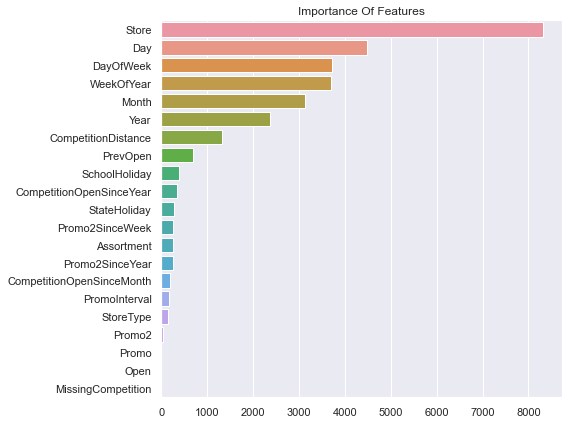

In [167]:
#t_train=train[train["Open"]==1].copy()
t_train=train_store.copy()
#t_train=tr.copy()

# convert some features to categorical
t_train["Store"]=t_train["Store"].astype("category")# that is important
t_train["Month"]=t_train["Month"].astype("category")
t_train["Year"]=t_train["Year"].astype("category")
t_train["StateHoliday"]=t_train["StateHoliday"].astype("category")
t_train["Assortment"]=t_train["Assortment"].astype("category")
t_train["Assortment"]=t_train["Assortment"].astype("category")
t_train["StoreType"]=t_train["StoreType"].astype("category")
t_train["PromoInterval"]=t_train["PromoInterval"].astype("category")


drop_columns=["Sales","Customers","SalesPerCustomer"]
target="Sales"

fast_loook(t_train,drop_columns,target)

`Save` last data 

In [168]:
train_store.to_csv("train_store.csv")

In [ ]:
sns.relplot(x="CompetitionDistance",y="SalesSum",data=sstore,col="StoreType",height=6)